# Working with FITS files

FITS (Flexible Image Transport System) is an old and widely-used container file format with broad official support in astronomy. More recently, it has become closely integrated with astropy. The standard has been updated over the decades but backward compatibility is taken very seriously ("once FITS, always FITS", in the official maxim).

A FITS file is structured as one or more Header Data Units (HDU). The headers are human-readable metadata. The data is flexible, but typically an image or a table in binary format.

Documentation for `astropy.io.fits` is at http://docs.astropy.org/en/stable/io/fits/index.html. There are also several useful tutorials at http://www.astropy.org/astropy-tutorials/tutorials.html?q=filterTutorials (better, clone them from GitHub: https://github.com/astropy/astropy-tutorials).

## Contents

- [Getting FITS files](#getting)
- [Image data](#image)
- Spectral data
    - [SDSS via astroML](#astroml)
    - [SDSS via astroquery](#astroquery)

In [1]:
import os
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits
from astropy.utils.data import download_file

<a id='getting'></a>  

## Getting FITS files

They are all over the internet, but there are a few convenient sources for demo purposes.

___Astropy___ has a set of files used for documentation and testing. The list is at https://astropy.stsci.edu/data/ and utility functions to access them are documented at https://astropy.readthedocs.io/en/stable/utils/index.html#module-astropy.utils.data.

___AstroML___ provides easy access to a variety of curated datasets, some of which are in FITS format: http://www.astroml.org/user_guide/datasets.html.

___Astroquery___ is a (mostly) unified interface to a wide variety of data: https://astroquery.readthedocs.io/en/latest/#archives.

<a id='image'></a>  

## Image data

This example uses an astropy tutorial file. It will be downloaded if necessary and cached on your local drive.

In [2]:
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )
image_file

'/home/colin/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f'

We can get the HDUList and display summary info about it. The `with open` syntax ensures the file is automatically closed even after an error.

In [3]:
with fits.open(image_file) as hdul:
    hdul.info()

Filename: /home/colin/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


So there are 2 HDUs, an image as the primary and a table as the extension. Displaying the contents we see that the headers are indeed human-readable but may need a bit of practice. Their length is `Cards` lines, 161 for the primary in this case. And yes, the format really is old enough to have started with punch cards (I used those for FORTRAN IV code back in 1974, which gives a clue to my age).

At least there are plenty of comments (starting with /). The image is a numpy array of int16, the table is a more complex object.

In [4]:
with fits.open(image_file) as hdul:
    for h in hdul:
        # truncate the headers for display
        display(h.header[:10], h.data) 

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               

array([[ 7201,  6642,  6642, ...,  9498,  9498, 10057],
       [ 6642,  6363,  6642, ..., 10057, 10616, 10616],
       [ 6922,  6642,  6922, ..., 10337, 11175, 10616],
       ...,
       [ 5412,  5132,  5412, ..., 13000, 12580, 12021],
       [ 5796,  5517,  5796, ..., 12546, 12546, 11987],
       [ 5796,  5796,  6076, ..., 11987, 12546, 12546]], dtype=int16)

XTENSION= 'TABLE   '           / ASCII table extension                          
BITPIX  =                    8 / 8 bit bytes                                    
NAXIS   =                    2 / 2-dimensional ASCII table                      
NAXIS1  =                   24 / Width of table in bytes                        
NAXIS2  =                 1600 / Number of rows in table                        
PCOUNT  =                    0 / Size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4 / Number of fields in each row                   
EXTNAME = 'er.mask '           /FITS: Name of Table                             
TTYPE1  = 'XI      '           /                                                

FITS_rec([(-3.12, -3.12, 0.09, 0.04), (-2.96, -3.12, 0.02, 0.07),
          (-2.8, -3.12, -0.07, 0.15), ..., (2.8, 3.12, 0.0, 0.0),
          (2.96, 3.12, 0.0, 0.0), (3.12, 3.12, 0.0, 0.0)],
         dtype=(numpy.record, [('XI', 'S6'), ('ETA', 'S6'), ('XI_CORR', 'S6'), ('ETA_CORR', 'S6')]))

If this is an image we should be able to display it. The shortcut to get just the primary data and ignore everything else is `getdata()`. Matplotlib can do the display.

(893, 891)


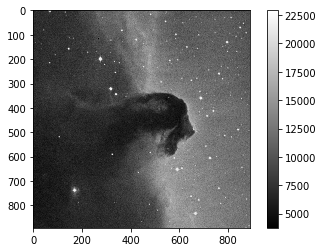

In [5]:
image_data = fits.getdata(image_file)
print(image_data.shape)

plt.imshow(image_data, cmap='gray')
plt.colorbar();

The axis labels are just pixel coordinates and not very helpful. There is enough information in the metadata to convert to astronomical coordinates, conveniently with APLpy if available (`conda install aplpy`). Note that the image is flipped vertically relative to Matplotlib.

/home/colin/anaconda3/envs/ml/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


INFO: Auto-setting vmin to  3.634e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.940e+04 [aplpy.core]


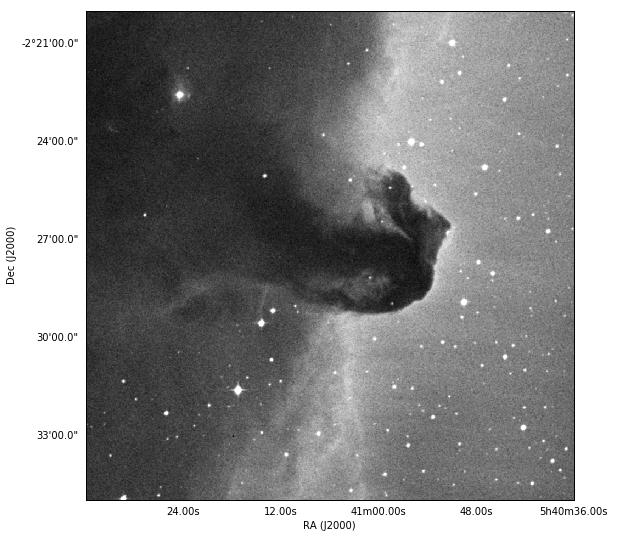

In [6]:
import aplpy
gc = aplpy.FITSFigure(image_file)
gc.show_grayscale()

To work with table data it is convenient to start by converting it to an astropy Table object. Working out what to do with it afterwards is left as an exercise for the reader (I haven't found useful documentation).

In [7]:
from astropy.table import Table
table_data = Table(fits.getdata(image_file, 1)) # first extension HDU
table_data.info()
table_data[:3]

<Table length=1600>
  name    dtype 
-------- -------
      XI float64
     ETA float64
 XI_CORR float64
ETA_CORR float64


XI,ETA,XI_CORR,ETA_CORR
float64,float64,float64,float64
-3.12,-3.12,0.09,0.04
-2.96,-3.12,0.02,0.07
-2.8,-3.12,-0.07,0.15


<a id='astroml'></a>  

## Spectral data

This can get complicated. To illustrate the file format, this section will focus on SDSS spectra using two different astropy-affiliated packages.

More details of SDSS DR7 spectra formats are at http://classic.sdss.org/dr7/dm/flatFiles/spSpec.html

### SDSS via astroML

It's worth loading astroML if you want SDSS data, as the format it returns is relatively easy to work with. However you will need some other way of finding the relevent spectrum.

In [8]:
from astroML.datasets import fetch_sdss_spectrum

# Fetch single spectrum
plate = 1615
mjd = 53166 # Julian day
fiber = 513

spec = fetch_sdss_spectrum(plate, mjd, fiber)
spec

`spec` wraps a subset of the data in astroML's helpful SDSSfits format with various useful methods. Raw SDSS data is in the hdulist if you need it. See [SDSS via astroquery]() for ways to work with this.

In [9]:
hdul = spec.hdulist
hdul

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f6590866780>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f659b4e9080>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f659b4e5908>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f6590866e10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f659b4dc9b0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f659b4e1748>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f65907b3080>]

Plot in Matplotlib, using astroML to bypass the HDUList:

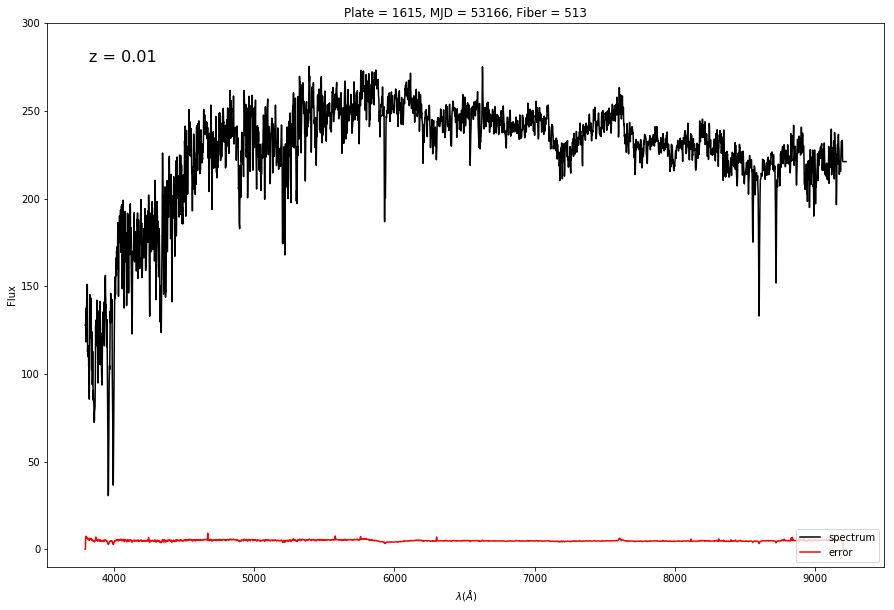

In [10]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes()
ax.plot(spec.wavelength(), spec.spectrum, '-k', label='spectrum')
ax.plot(spec.wavelength(), spec.error, '-', color='red', label='error')

ax.legend(loc=4)

ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

ax.text(0.05, 0.95, 'z = %.2f' % spec.z, size=16,
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')

ax.set_ylim(-10, 300);

<a id='astroquery'></a>  

### SDSS via Astroquery

`astroquery.sdss` is good for searching and retrieving spectra. The results may need some work to understand them: very full and complicated data with no sugar-coating. 

In [11]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords

/home/colin/anaconda3/envs/ml/lib/python3.6/site-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


Look for spectra from a sky region:

In [12]:
pos = coords.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')
xid = SDSS.query_region(pos, spectro=True)
xid

/home/colin/anaconda3/envs/ml/lib/python3.6/site-packages/astroquery/sdss/core.py:856: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,instrument
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,bytes4
2.02344596303101,14.8398237521302,1237652943176138868,1739,301,3,315,0.04559058,751,52251,160,845594848269461504,26,SDSS


`xid` contains plate, mjd and fiber info, enough to identify the spectrum. Also sky coordinates and redshift. It might be simpler to feed this back into astroML, but let's push on with astroquery to see how things look.

`SDSS.get_spectra()` returns matches as a list of HDULists. For simplicity, just take the first one:

In [13]:
sp = SDSS.get_spectra(matches=xid)[0]
for s in sp:
    display(s.name)

'PRIMARY'

'COADD'

'SPECOBJ'

'SPZLINE'

'B1-00012103-00012101-00012102'

'B1-00012104-00012101-00012102'

'B1-00012105-00012101-00012102'

'R1-00012103-00012101-00012102'

'R1-00012104-00012101-00012102'

'R1-00012105-00012101-00012102'

This data is in raw SDSS format without some of the utility functions that astroML adds. 

HDU 0 is just a long header. The most useful spectrum is in HDU 1, with a format roughly like this:

```
HDU 1 (extname COADD): Coadded Spectrum from spPlate

Binary table with columns:
Name      Type      Comment
flux      float32   coadded calibrated flux [10-17 ergs/s/cm2/Å]
loglam    float32   log10(wavelength [Å])
ivar      float32   inverse variance of flux
and_mask  int32     AND mask
or_mask   int32     OR mask
wdisp     float32   wavelength dispersion in pixel=dloglam units
sky       float32   subtracted sky flux [10-17 ergs/s/cm2/Å]
model     float32   pipeline best model fit used for classification and redshift
```

We can pull the spectral data into a Table and plot it:

In [14]:
spec2 = Table(sp['COADD'].data)
display(len(spec2))
spec2[:3]

3841

flux,loglam,ivar,and_mask,or_mask,wdisp,sky,model
float32,float32,float32,int32,int32,float32,float32,float32
30.596626,3.5797,0.06440803,0,0,1.2189666,8.154254,36.077015
33.245728,3.5798,0.0,0,0,1.2187515,7.656426,34.99724
35.89512,3.5799,0.062928334,0,0,1.2185355,7.231167,35.379208


Text(0, 0.5, 'Flux')

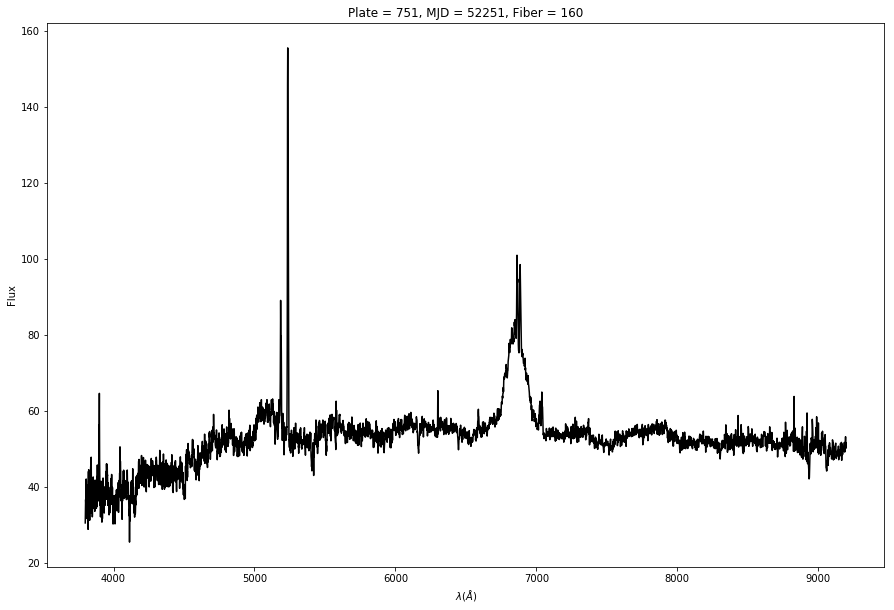

In [15]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes()
ax.plot(10**spec2['loglam'], spec2['flux'], '-k', label='spectrum')
# ax.plot(10**spec2['loglam'], spec2['wdisp'], '-r', label='dispersion')

# ax.legend()
src = xid[0]
ax.set_title('Plate = {}, MJD = {}, Fiber = {}'
             .format(src['plate'], src['mjd'], src['fiberID']))

ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')

HDU 3 ('SPZLINE') contains spectral line assignments, blocks of them constrained to have the same redshift.

```
PLATE              Plate number
MJD                Modified Julian date of observation
FIBERID            Fiber ID (1 to NFIBER)
LINENAME           Line name
LINEWAVE           Catalog wavelength for this line in vacuum Angstroms
LINEZ              Redshift
LINEZ_ERR          Redshift error (negative for invalid fit)
LINESIGMA          Gaussian width in km/sec
LINESIGMA_ERR      Error in gaussian width (negative for invalid fit)
LINEAREA           Area in gaussian fit where units are (flux-units) * Ang
LINEAREA_ERR       Flux error (negative for invalid fit)
LINEEW             Equivalent width (Angstroms)
LINEEW_ERR         Equivalent width error (negative for invalid fit)
LINECONTLEVEL      Continuum level at line center
LINECONTLEVEL_ERR  Error in continuum level at line center
LINENPIXLEFT       Number of pixels from the line center to -3 sigma that have INVVAR > 0
LINENPIXRIGHT      Number of pixels from the line center to +3 sigma that have INVVAR > 0
LINEDOF            Degrees of freedom in fit, approximated as LINENPIX minus the number of terms fit for 
                    that line, which can be fractional if one parameter if fixed betwen several lines
LINECHI2           chi2 for all points within +/- 3 sigma of the line center (negative if no such points)
```

In [16]:
lines = Table(sp['SPZLINE'].data)
lines

PLATE,MJD,FIBERID,LINENAME,LINEWAVE,LINEZ,LINEZ_ERR,LINESIGMA,LINESIGMA_ERR,LINEAREA,LINEAREA_ERR,LINEEW,LINEEW_ERR,LINECONTLEVEL,LINECONTLEVEL_ERR,LINENPIXLEFT,LINENPIXRIGHT,LINEDOF,LINECHI2
int32,int32,int32,str13,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,float32,float32
751,52251,160,Ly_alpha,1215.67,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0,0,0.0,-1.0
751,52251,160,N_V 1240,1240.81,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0,0,0.0,-1.0
751,52251,160,C_IV 1549,1549.48,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0,0,0.0,-1.0
751,52251,160,He_II 1640,1640.42,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0,0,0.0,-1.0
751,52251,160,C_III] 1908,1908.734,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0,0,0.0,-1.0
751,52251,160,Mg_II 2799,2800.3151836549728,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0,0,0.0,-1.0
751,52251,160,[O_II] 3725,3727.091726797987,0.040059764,0.00023142774,2431.6138,48.71398,-713.08344,472.43634,-19.579514,13.138234,36.419876,0.30932984,87,105,190.90388,414.77597
751,52251,160,[O_II] 3727,3729.875447997208,0.04005976,0.00023142774,2431.6138,48.71398,953.3306,471.27902,26.13246,12.698287,36.48071,0.3075308,90,106,194.90388,418.09
751,52251,160,[Ne_III] 3868,3869.8567972272717,0.04005973,0.00023142771,2431.6138,48.71398,-501.87088,69.18284,-12.896927,1.8564905,38.91399,0.23731329,106,106,210.90388,395.92944
